In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('C:/Users/jasmeet/Desktop/big mart/Train.csv')
test = pd.read_csv('C:/Users/jasmeet/Desktop/big mart/Test.csv')
train.describe()
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [3]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [6]:
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
Big_Mart = pd.concat([train, test], sort = False)
print(train.shape, test.shape, Big_Mart.shape)

(8523, 13) (5681, 13) (14204, 13)


In [7]:
Big_Mart['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

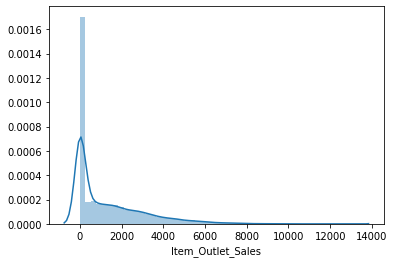

In [8]:
sns.distplot(Big_Mart['Item_Outlet_Sales'])

In [9]:
categorial_features = Big_Mart.select_dtypes(include=[np.object])
categorial_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train


In [10]:
numerical_features = Big_Mart.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


# DATA CLEANING

In [11]:
Big_Mart.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [12]:
Big_Mart.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

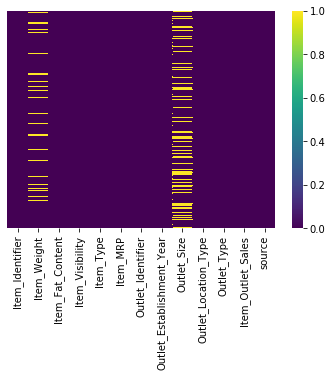

In [13]:
sns.heatmap(Big_Mart.isnull(),yticklabels=False,cmap="viridis")

In [14]:
for col in categorial_features:
    print('\n%s column: '%col)
    print(Big_Mart[col].value_counts())


Item_Identifier column: 
FDB60    10
FDK26    10
FDV19    10
FDQ37    10
FDL12    10
FDA07    10
FDK52    10
FDQ28    10
FDT39    10
FDQ11    10
FDN03    10
FDX35    10
FDD05    10
FDE11    10
FDT43    10
FDI53    10
FDI20    10
FDG33    10
FDQ31    10
DRG48    10
NCQ30    10
NCX29    10
FDV52    10
FDG40    10
FDU32    10
FDZ12    10
FDA32    10
FDP38    10
FDH40    10
FDV01    10
         ..
FDL28     8
NCP53     8
FDZ60     8
FDZ03     8
FDI14     8
NCY05     8
FDY25     8
NCK07     8
DRG39     8
FDS50     8
FDJ04     8
FDL24     8
NCU06     8
FDJ16     8
FDV07     8
DRK11     8
NCT05     8
FDI46     7
NCW54     7
DRN11     7
FDX49     7
NCL42     7
FDO33     7
FDM10     7
FDM50     7
FDL50     7
FDM52     7
FDR51     7
FDS22     7
FDH58     7
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content column: 
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type column: 
Fruits and Vegetables    201

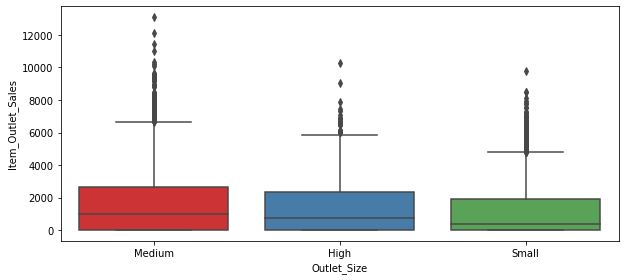

In [15]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=Big_Mart, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

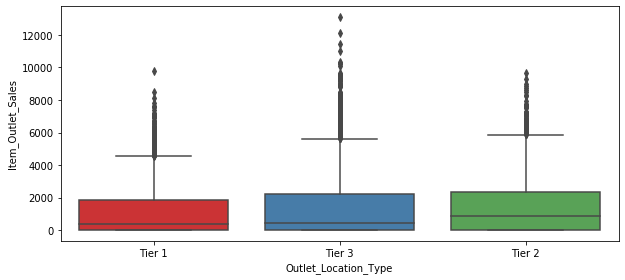

In [16]:
plt.figure(figsize = (10,9))

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=Big_Mart, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

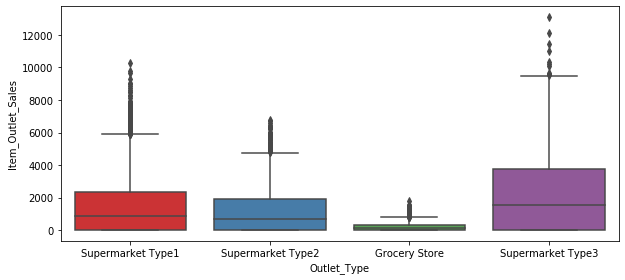

In [17]:
plt.figure(figsize = (10,9))

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=Big_Mart, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

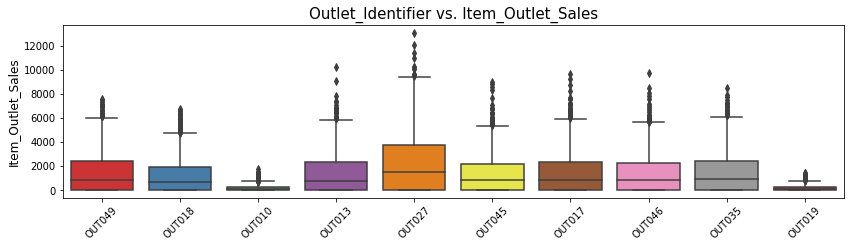

In [18]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=Big_Mart, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

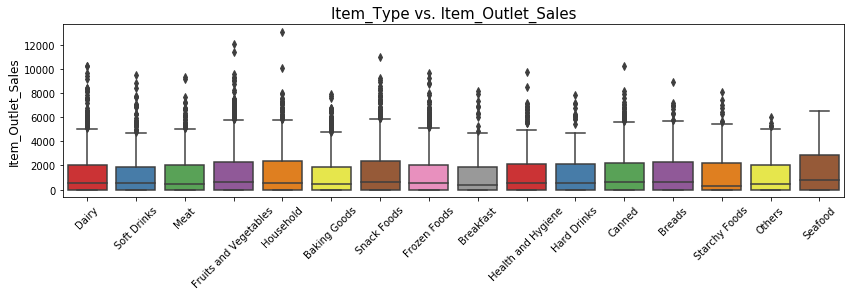

In [19]:
plt.figure(figsize = (14,9))

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=Big_Mart, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [20]:
item_avg_weight = Big_Mart.pivot_table(values='Item_Weight', index='Item_Identifier')

missing_values = Big_Mart['Item_Weight'].isnull()
print('Missing values: %d' %sum(missing_values))

Big_Mart.loc[missing_values,'Item_Weight']  = Big_Mart.loc[missing_values,'Item_Identifier'].apply(lambda x: item_avg_weight.at[x,'Item_Weight'])
print('Missing values after imputation: %d' %sum(Big_Mart['Item_Weight'].isnull()))

Missing values: 2439
Missing values after imputation: 0


In [21]:
from scipy.stats import mode

#Determing the mode for each
mode_is=Big_Mart['Outlet_Size'].mode()
print (mode_is)
outlet_size_mode = Big_Mart.pivot_table(values='Outlet_Size',
                                   columns='Outlet_Type',
                                   aggfunc=lambda x: x.mode().iat[0])
print (outlet_size_mode)

#Get a boolean variable specifying missing Item_Weight values
miss_bool = Big_Mart['Outlet_Size'].isnull() 
print(miss_bool)
#Impute data and check #missing values before and after imputation to confirm
print ('\nOrignal missing:%d' %sum(miss_bool))

Big_Mart.loc[miss_bool,'Outlet_Size'] = Big_Mart.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
miss_values = Big_Mart['Outlet_Size'].isnull()
print ('\n Missing Values after imputation:%d' %sum(miss_values))





0    Medium
dtype: object
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  
0       False
1       False
2       False
3        True
4       False
5       False
6       False
7       False
8        True
9        True
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25       True
26      False
27      False
28       True
29      False
        ...  
5651    False
5652     True
5653    False
5654    False
5655    False
5656    False
5657    False
5658    False
5659    False
5660    False
5661    False
5662     True
5663    False
5664    False
5665    False
5666    False
5667    False
5668     True
5669    False
5670     True
5671    False
5672    False
5673    False
5674    False
5675    F

In [22]:
#Determine average visibility of a product
visibility_avg = Big_Mart.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (Big_Mart['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))
Big_Mart.loc[missing_values,'Item_Visibility'] = Big_Mart.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(Big_Mart['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


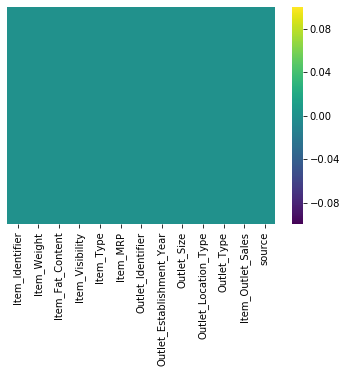

In [23]:
sns.heatmap(Big_Mart.isnull(),yticklabels=False,cmap="viridis")